# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [10]:
def apply_svd_custom(X_train, X_test, n_components):
    A_TA = np.dot(X_train.T, X_train)
    eigenvalues, V = np.linalg.eigh(A_TA)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    V = V[:, sorted_indices]
    V_reduced = V[:, :n_components]
    top_5_singular_vectors = V_reduced[:, :5]
    X_train_reduced = np.dot(X_train,V_reduced)
    X_test_reduced = np.dot(X_test, V_reduced)

    return X_train_reduced, X_test_reduced, top_5_singular_vectors

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [11]:
svd_components = [1,30,60,210,350,500,784]  # You need to decide what number to search...

# Store the results
results = []
singular_values=None
print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, top_5_singular_vectors = apply_svd_custom(X_train, X_test, n_components)
    singular_values = top_5_singular_vectors
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    # Append the results
    results.append([n_components, accuracy, training_time])
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 1, Accuracy: 0.1988, Training time: 0.8478 seconds
Applying custom SVD with 30 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8924, Training time: 4.3756 seconds
Applying custom SVD with 60 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.9133, Training time: 19.1045 seconds
Applying custom SVD with 210 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 210, Accuracy: 0.9211, Training time: 157.9877 seconds
Applying custom SVD with 350 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 350, Accuracy: 0.9196, Training time: 347.4695 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 523.1017 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 868.8856 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


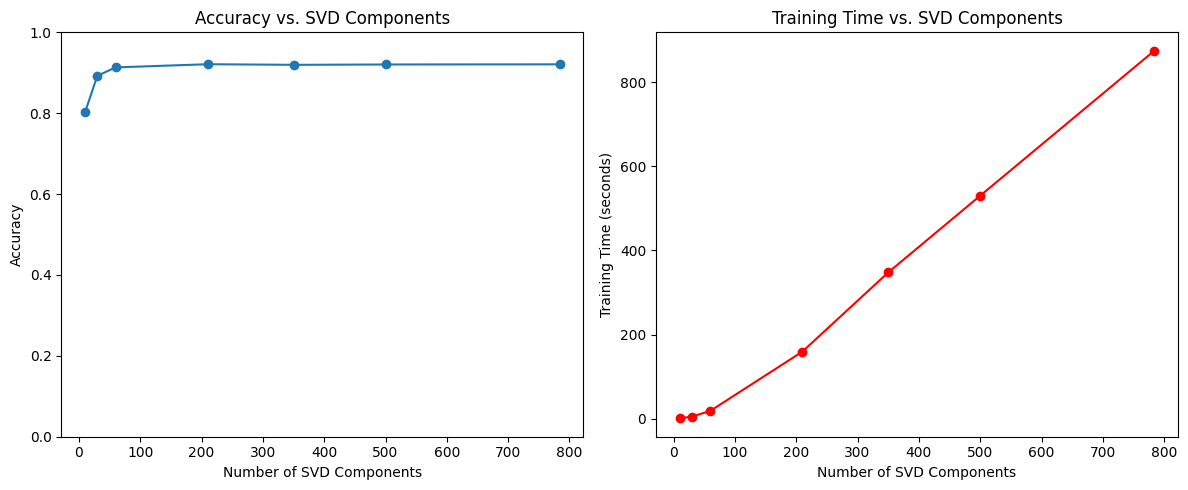

In [8]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
svd_components = [result[0] for result in results]
accuracies = [result[1] for result in results]
times = [result[2] for result in results]
plt.figure(figsize=(12, 5))
    # Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(svd_components, accuracies, marker='o')
plt.title('Accuracy vs. SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
# Plot Training Time
plt.subplot(1, 2, 2)
plt.plot(svd_components, times, marker='o', color='r')
plt.title('Training Time vs. SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

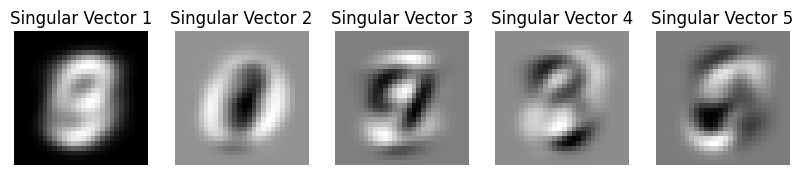

In [12]:
plt.figure(figsize=(10, 2))  # Adjust the figure size to fit all images
for i in range(5):
        # Reshape each singular vector to 28x28 (assuming each vector has 784 elements)
        vector_reshaped = singular_values[:, i].reshape(28, 28)

        # Create a subplot for each singular vector
        plt.subplot(1, 5, i + 1)  # 1 row, 5 columns for 5 vectors
        plt.imshow(vector_reshaped, cmap='gray')  # Display the reshaped vector as an image
        plt.axis('off')  # Turn off the axis labels for better visualization
        plt.title(f'Singular Vector {i + 1}')
plt.show()  # Display the plot


## Part 6: Analyze / Conclusion

YOUR ANSWER: Analysing the "Accuracy vs n_components" graph we can derive that the higher the number of components, the higher the accuracy. In addition, analyzing the "Time vs n_components" graph, we derive that the higher the number of components, the longer the time required to train the model is longer. This displays that it shows a trade-off as a higher number of SVD components provides more detailed information from the original data, which enhances the model’s ability to capture patterns, thereby improving accuracy. However, this comes at the cost of increased computational time due to the higher dimensionality involved in the training process. The number of components that looks the best is 60 this is because anything that is above that number of components gains a diminishing return in accuracy, however, the computational time rises exponentially. In addition to that we can see from the blurred pictures, that SVD effectively reduces dimensionality by preserving the most critical information in the first few singular vectors.